
# 第八章 文本挖掘


![image.png](images/author.png)

What can be learned from 5 million books

https://www.bilibili.com/video/BV1jJ411u7Nd

This talk by Jean-Baptiste Michel and Erez Lieberman Aiden is phenomenal. 


Michel, J.-B., et al. (2011). Quantitative Analysis of Culture Using Millions of Digitized Books. Science, 331, 176–182.

In [1]:
%%html 
<iframe src="//player.bilibili.com/player.html?aid=68934891&bvid=BV1jJ411u7Nd&cid=119471774&page=1" 
width=1000 height=600
scrolling="no" border="0" frameborder="no" framespacing="0" allowfullscreen="true"> </iframe>

![](./img/books.jpg)

试一下谷歌图书的数据: https://books.google.com/ngrams/
    

数据下载： http://www.culturomics.org/home

##  Bag-of-words model （BOW)

Represent text as numerical feature vectors

- We create a vocabulary of unique tokens—for example, words—from the entire set of documents.
- We construct a feature vector from each document that contains the counts of how often each word occurs in the particular document.

Since the unique words in each document represent only a small subset of all the
words in the bag-of-words vocabulary, the feature vectors will consist of mostly
zeros, which is why we call them sparse

![image.png](images/bow.png)

“词袋模型”（Bag of words model）假定对于一个文本：
- 忽略词序、语法、句法；
- 将其仅仅看做是一个词集合或组合；
- 每个词的出现都是独立的，不依赖于其他词是否出现。
    - 文本任意一个位置出现某一个词汇是独立选择的，不受前面句子的影响。

这种假设虽然对自然语言进行了简化，便于模型化。

Document-Term Matrix (DTM)


问题：例如在新闻个性化推荐中，用户对“南京醉酒驾车事故”这个短语很感兴趣。词袋模型忽略了顺序和句法，认为用户对“南京”、“醉酒”、“驾车”和“事故”感兴趣，因此可能推荐出和“南京”、“公交车”、“事故”相关的新闻。

解决方法: 可抽取出整个短语；或者采用高阶（2阶以上）统计语言模型。例如bigram、trigram来将词序保留下来，相当于bag of bigram和bag of trigram。

### Transforming words into feature vectors

A document-term matrix or term-document matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. 

In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms. 

There are various schemes for determining the value that each entry in the matrix should take. One such scheme is tf-idf. They are useful in the field of natural language processing.

D1 = "I like databases"

D2 = "I hate databases"

|          |  I        |    like   |hate        | databases   |
| -------------|:-------------:|:-------------:|:-------------:|-----:|
| D1| 1| 1 | 0 |1|
| D2| 1| 0 | 1 |1|

In [10]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(ngram_range=(1, 2))
docs = np.array([
        'The sun is shining',
        'The weather is sweet',
        'The sun is shining and the weather is sweet'])
bag = count.fit_transform(docs)

In [12]:
count?

In [13]:
count.get_feature_names()

['and',
 'and the',
 'is',
 'is shining',
 'is sweet',
 'shining',
 'shining and',
 'sun',
 'sun is',
 'sweet',
 'the',
 'the sun',
 'the weather',
 'weather',
 'weather is']

In [14]:
print(count.vocabulary_) # word: position index

{'the': 10, 'sun': 7, 'is': 2, 'shining': 5, 'the sun': 11, 'sun is': 8, 'is shining': 3, 'weather': 13, 'sweet': 9, 'the weather': 12, 'weather is': 14, 'is sweet': 4, 'and': 0, 'shining and': 6, 'and the': 1}


In [15]:
type(bag)

scipy.sparse.csr.csr_matrix

In [16]:
print(bag.toarray())

[[0 0 1 1 0 1 0 1 1 0 1 1 0 0 0]
 [0 0 1 0 1 0 0 0 0 1 1 0 1 1 1]
 [1 1 2 1 1 1 1 1 1 1 2 1 1 1 1]]


In [17]:
import pandas as pd
pd.DataFrame(bag.toarray(), columns = count.get_feature_names())

,and,and the,is,is shining,is sweet,shining,shining and,sun,sun is,sweet,the,the sun,the weather,weather,weather is
0,0,0,1,1,0,1,0,1,1,0,1,1,0,0,0
1,0,0,1,0,1,0,0,0,0,1,1,0,1,1,1
2,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1


The sequence of items in the bag-of-words model that we just created is also called the 1-gram or unigram model: each item or token in the vocabulary represents a single word. 

## n-gram model
The choice of the number n in the n-gram model depends on the particular application

- 1-gram: "the", "sun", "is", "shining"
- 2-gram: "the sun", "sun is", "is shining" 

The CountVectorizer class in scikit-learn allows us to use different
n-gram models via its `ngram_range` parameter. 

While a 1-gram
representation is used by default

we could switch to a 2-gram
representation by initializing a new CountVectorizer instance with
ngram_range=(2,2).

## TF-IDF
Assessing word relevancy via term frequency-inverse document frequency

$$tf*idf(t, d) = tf(t, d) \times idf(t)$$

- $tf(t, d)$ is the term frequency of term t in document d.
- inverse document frequency $idf(t)$ can be calculated as: $idf(t) = log \frac{n_d}{1 + df(d, t)}$



Question: Why do we add the constant 1 to the denominator ?



The tf-idf equation that was implemented in scikit-learn is as follows: $tf*idf(t, d) = tf(t, d) \times （idf(t, d) + 1）$
 
[SKlearn use `smooth_idf=True`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer) $idf(t) = log \frac{1+n_d}{1 + df(d, t)} + 1$

where $n_d$ is the total number of documents, and $df(d, t)$ is the number of documents $d$ that contain the term $t$. 


 
### L2-normalization

$$l2_{x} = \frac{x} {\sqrt{\sum {x^2}}}$$



课堂作业：请根据公式计算'is'这个词在文本2中的tfidf数值？

![](./img/ask.jpeg)

### TfidfTransformer
Scikit-learn implements yet another transformer, the TfidfTransformer, that
takes the raw term frequencies from CountVectorizer as input and transforms
them into tf-idfs:

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)

tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(count.fit_transform(docs)).toarray())


[[0.   0.   0.31 0.4  0.   0.4  0.   0.4  0.4  0.   0.31 0.4  0.   0.
  0.  ]
 [0.   0.   0.31 0.   0.4  0.   0.   0.   0.   0.4  0.31 0.   0.4  0.4
  0.4 ]
 [0.29 0.29 0.35 0.22 0.22 0.22 0.29 0.22 0.22 0.22 0.35 0.22 0.22 0.22
  0.22]]


In [19]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)

tfidf = TfidfTransformer(use_idf=True, norm=None, smooth_idf=True)
print(tfidf.fit_transform(count.fit_transform(docs)).toarray())


[[0.   0.   1.   1.29 0.   1.29 0.   1.29 1.29 0.   1.   1.29 0.   0.
  0.  ]
 [0.   0.   1.   0.   1.29 0.   0.   0.   0.   1.29 1.   0.   1.29 1.29
  1.29]
 [1.69 1.69 2.   1.29 1.29 1.29 1.69 1.29 1.29 1.29 2.   1.29 1.29 1.29
  1.29]]


In [20]:
import pandas as pd
bag = tfidf.fit_transform(count.fit_transform(docs))
pd.DataFrame(bag.toarray(), columns = count.get_feature_names())

,and,and the,is,is shining,is sweet,shining,shining and,sun,sun is,sweet,the,the sun,the weather,weather,weather is
0,0.000000,0.000000,1.0,1.287682,0.000000,1.287682,0.000000,1.287682,1.287682,0.000000,1.0,1.287682,0.000000,0.000000,0.000000
1,0.000000,0.000000,1.0,0.000000,1.287682,0.000000,0.000000,0.000000,0.000000,1.287682,1.0,0.000000,1.287682,1.287682,1.287682
2,1.693147,1.693147,2.0,1.287682,1.287682,1.287682,1.693147,1.287682,1.287682,1.287682,2.0,1.287682,1.287682,1.287682,1.287682


In [21]:
# 一个词的tfidf值
import numpy as np
tf_is = 2.0
n_docs = 3.0
# smooth_idf=True & norm = None
idf_is = np.log((1+n_docs) / (1+3)) + 1

tfidf_is = tf_is * idf_is
print('tf-idf of term "is" = %.2f' % tfidf_is)

tf-idf of term "is" = 2.00


In [22]:
# *最后一个文本*里的词的tfidf原始数值（未标准化）
tfidf = TfidfTransformer(use_idf=True, norm=None, smooth_idf=True)
raw_tfidf = tfidf.fit_transform(count.fit_transform(docs)).toarray()[-1]
raw_tfidf, count.get_feature_names()

(array([1.69, 1.69, 2.  , 1.29, 1.29, 1.29, 1.69, 1.29, 1.29, 1.29, 2.  ,
        1.29, 1.29, 1.29, 1.29]),
 ['and',
  'and the',
  'is',
  'is shining',
  'is sweet',
  'shining',
  'shining and',
  'sun',
  'sun is',
  'sweet',
  'the',
  'the sun',
  'the weather',
  'weather',
  'weather is'])

In [23]:
# l2标准化后的tfidf数值
l2_tfidf = raw_tfidf / np.sqrt(np.sum(raw_tfidf**2))
l2_tfidf 

array([0.29, 0.29, 0.35, 0.22, 0.22, 0.22, 0.29, 0.22, 0.22, 0.22, 0.35,
       0.22, 0.22, 0.22, 0.22])

## 政府工作报告文本挖掘

### 0. 读取数据

In [26]:
with open('./data/gov_reports1954-2021.txt', 'r', encoding = 'utf-8') as f:
    reports = f.readlines()
    

In [27]:
len(reports)

52

In [37]:
print(reports[-7][:1000])

1964	1964年国务院政府工作报告（摘要）——１９６４年１２月２１日和２２日在第三届全国人民代表大会第一次会议上　　　　　　　　　　　  　　　　　　　　　　　　　　　国务院总理周恩来　　五年来，我国各族人民在中国共产党的英明领导下，高举毛泽东思想的光辉旗帜，坚持鼓足干劲、力争上游、多快好省地建设社会主义的总路线，在全国范围内开展了阶级斗争、生产斗争、科学实验三大革命运动，有力地反击了资本主义和封建势力的进攻，提高了人民群众的社会主义觉悟，基本上完成了调整国民经济的任务，使工农业生产全面高涨，整个国民经济全面好转，我国自力更生的力量大为增强。同时，在国际上，我们同美帝国主义、各国反动派和现代修正主义进行了针锋相对的斗争，打退了他们掀起的一次又一次的反华高潮；积极地支援了各国革命人民，发展了同许多国家的友好合作关系；我国的国际威望更加提高了，我们的朋友遍天下。　　我们要进一步开展社会主义教育运动，坚决依靠工人阶级、贫农下中农、革命的干部、革命的知识分子和其他革命分子，根据社会主义的彻底革命的原则，在政治、经济、思想和组织这四个方面，进行清理和基本建设，在人民群众中深刻地进行一次阶级教育和社会主义教育；要进一步开展思想文化战线上的社会主义革命，逐步实现知识分子劳动化，劳动人民知识化；要进一步巩固和发展人民民主统一战线，加强各民族的大团结；各级机关和各级干部必须革命化，都要学习解放军、大庆、大寨的彻底革命的精神和工作作风。在深入广泛开展社会主义教育运动的基础上，一九六五年要大力组织工农业生产的新高潮，为一九六六年开始的第三个五年计划作好准备，争取在不太长的历史时期内，把我国建成一个具有现代农业、现代工业、现代国防和现代科学技术的社会主义强国。在国际方面，我们要继续贯彻我国对外政策的总路线，同全世界人民一起，坚决反对美帝国主义及其走狗，为争取世界和平、民族解放、人民民主和社会主义事业的新胜利而奋斗。　　国民经济的成就和今后的建设任务　　周恩来总理在报告中首先指出，从第二届全国人民代表大会第一次会议以来，我国各族人民，在中国共产党的英明领导下，高举毛泽东思想的光辉旗帜，坚持鼓足干劲、力争上游、多快好省地建设社会主义的总路线，在全国范围内展开了阶级斗争、生产斗争、科学实验三大革命运动，在国际上同帝国主义、各国反动派和现代修正主义进行了针锋相对的斗争，取得了一个又一个的伟大胜

In [16]:
print(reports[4][:500])

1959						1959年国务院政府工作报告	——1959年4月18日在第二届全国人民代表大会第一次会议上	　　　　　　　　　　　　　　　　  国务院总理周恩来	各位代表：	　　我现在根据国务院的决定，向第二届全国人民代表大会第一次会议作政府工作报告。	　　一、第一个五年计划时期内和第二个五年计划的第一年——一九五八年的伟大成就	　　在第一届全国人民代表大会的四年多的任期中间，我们的国家经历了一系列的具有重大历史意义的变化。	　　当一九五四年第一届全国人民代表大会第一次会议召开的时候，我国社会主义经济已经在国民经济中居于主导的地位，但是，我国还存在着大量的资本主义的工业和商业，并且大量地存在着个体的农业和手工业。农村中劳动互助运动已经广泛地发展起来，参加农业劳动互助组的农户达到了百分之六十左右，但是，组成农业生产合作社的农户还只占农户总数的百分之二左右。在那时候，我国已经完成了经济恢复时期的任务，开始了大规模的、有计划的经济建设。但是，究竟我们能不能在一个较短的时间内，使我国这样一个有六亿多人口的大国，建立起社会主义工业化的基础来，还有待于事实的证明。而现在呢？大家看到，只经过四年


 pip install jieba
> https://github.com/fxsjy/jieba

 pip install wordcloud
>  https://github.com/amueller/word_cloud

 pip install gensim


In [20]:
pip install gensim

     |████████████████████████████████| 24.2 MB 376 kB/s eta 0:00:01
     |████████████████████████████████| 103 kB 625 kB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-2.0.0-py3-none-any.whl size=101341 sha256=373e4939f516de66ae607886c52d7a00529e0930868ce9f5ae1ecec2297f40f4
  Stored in directory: /Users/datalab/Library/Caches/pip/wheels/bb/1c/9c/412ec03f6d5ac7d41f4b965bde3fc0d1bd201da5ba3e2636de
Successfully built smart-open
Note: you may need to restart the kernel to use updated packages.


In [38]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sys 
import numpy as np
from collections import defaultdict
import statsmodels.api as sm
from wordcloud import WordCloud
import jieba
import matplotlib
import gensim
from gensim import corpora, models, similarities
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
#matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体 
matplotlib.rc("savefig", dpi=400)

In [75]:
# 为了确保中文可以在matplotlib里正确显示
#matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体 
# 需要确定系统安装了Microsoft YaHei

In [76]:
# import matplotlib
# my_font = matplotlib.font_manager.FontProperties(
#     fname='/Users/chengjun/github/cjc/data/msyh.ttf')

### 1. 分词

In [39]:
import jieba

seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式

seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print(", ".join(seg_list))

seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")  # 搜索引擎模式
print(", ".join(seg_list))

Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
Default Mode: 我/ 来到/ 北京/ 清华大学
他, 来到, 了, 网易, 杭研, 大厦
小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造


## 2. 停用词

In [40]:
filename = './data/stopwords.txt'
stopwords = {}
f = open(filename, 'r')
line = f.readline().rstrip()
while line:
    stopwords.setdefault(line, 0)
    stopwords[line] = 1
    line = f.readline().rstrip()
f.close()

In [36]:
adding_stopwords = [u'我们', u'要', u'地', u'有', u'这', u'人',
                    u'发展',u'建设',u'加强',u'继续',u'对',u'等',
                    u'推进',u'工作',u'增加']
for s in adding_stopwords: stopwords[s]=10 

### 3. 关键词抽取

#### 基于TF-IDF 算法的关键词抽取

In [41]:
import jieba.analyse
txt = reports[-1]
tf = jieba.analyse.extract_tags(txt, topK=200, withWeight=True)

In [42]:
u"、".join([i[0] for i in tf[:50]])

'人民、我们、国家、我国、一九五三年、工业、一九五四年、必须、工作、建设、发展、和平、一九四九年、社会主义、一九五、国家机关、生产、计划、全国、农业、亚洲、美国、事业、企业、应当、经济、这些、改造、增加、并且、完成、但是、已经、等于、合作社、集团、方面、需要、台湾、资本主义、反对、几年、生活、建立、为了、技术、这个、进行、日内瓦、问题'

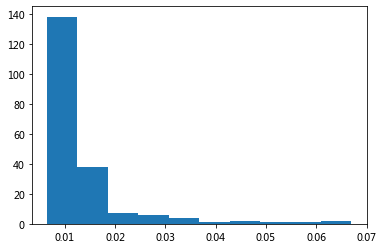

In [43]:
plt.hist([i[1] for i in tf])
plt.show()

#### 基于 TextRank 算法的关键词抽取

In [44]:
tr = jieba.analyse.textrank(txt,topK=200, withWeight=True)
u"、".join([i[0] for i in tr[:50]])

'国家、人民、工业、发展、建设、工作、生产、美国、企业、经济、计划、社会主义、中国、进行、全国、技术、亚洲、集团、需要、问题、农业、方面、完成、建立、台湾、生活、事业、没有、改造、应当、资本主义、增加、关系、组织、保证、会议、侵略、不能、注意、加强、战争、提高、社会、文化、继续、政府、现代化、能够、日内瓦、世界'

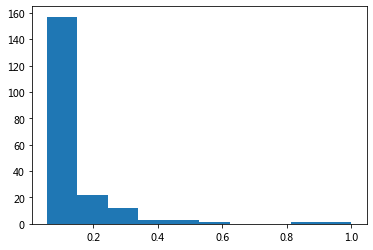

In [45]:
plt.hist([i[1] for i in tr])
plt.show()

In [46]:
import pandas as pd

def keywords(index):
    txt = reports[-index]
    tf = jieba.analyse.extract_tags(txt, topK=200, withWeight=True)
    tr = jieba.analyse.textrank(txt,topK=200, withWeight=True)
    tfdata = pd.DataFrame(tf, columns=['word', 'tfidf'])
    trdata = pd.DataFrame(tr, columns=['word', 'textrank'])
    worddata = pd.merge(tfdata, trdata, on='word')
    fig = plt.figure(figsize=(16, 6),facecolor='white')
    plt.plot(worddata.tfidf, worddata.textrank, linestyle='',marker='.')
    for i in range(len(worddata.word)):
        plt.text(worddata.tfidf[i], worddata.textrank[i], worddata.word[i], 
                 fontsize = worddata.textrank[i]*30, 
                 color = 'red', rotation = 0
                )
    plt.title(txt[:4])
    plt.xlabel('Tf-Idf')
    plt.ylabel('TextRank')
    plt.show()

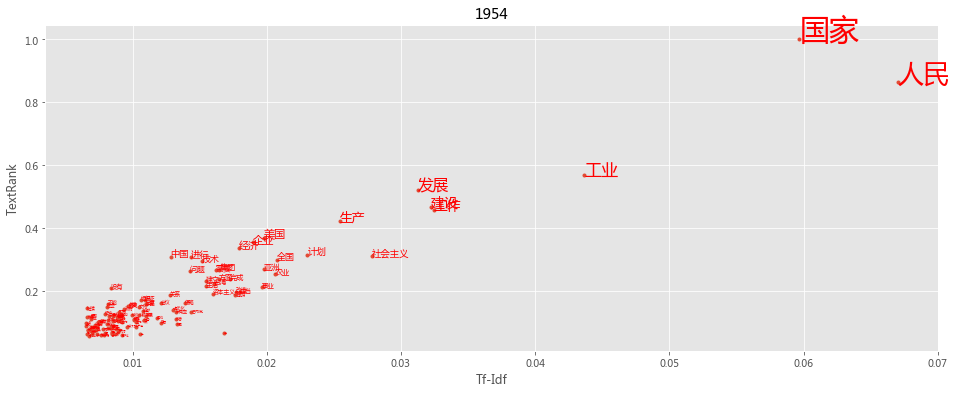

In [49]:
plt.style.use('ggplot')

keywords(1)

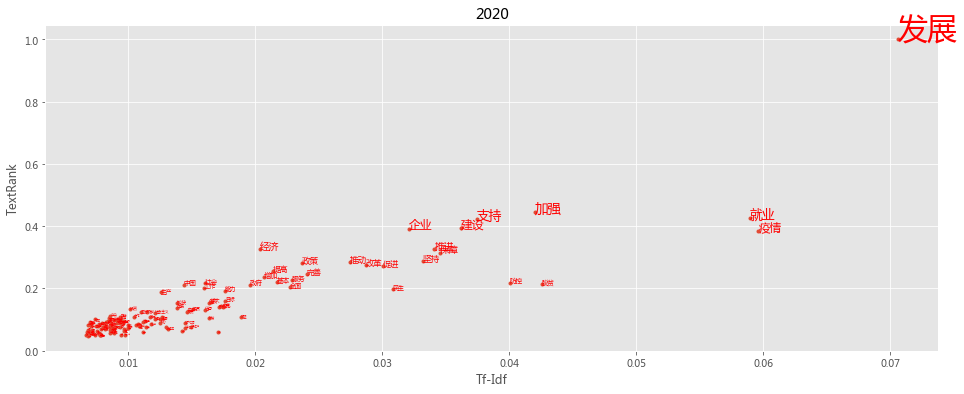

In [55]:
keywords(-1)

TextRank: Bringing Order into Texts

基本思想:

* 将待抽取关键词的文本进行分词
* 以固定窗口大小(默认为5，通过span属性调整)，词之间的共现关系，构建图
* 计算图中节点的PageRank，注意是无向带权图

### 4. 词云

In [44]:
def wordcloudplot(txt, year):
    wordcloud = WordCloud(font_path='../data/msyh.ttf').generate(txt)
    # Open a plot of the generated image.
    fig = plt.figure(figsize=(16, 6),facecolor='white')
    plt.imshow(wordcloud)
    plt.title(year)
    plt.axis("off")
    #plt.show()

#### 基于tfidf过滤的词云

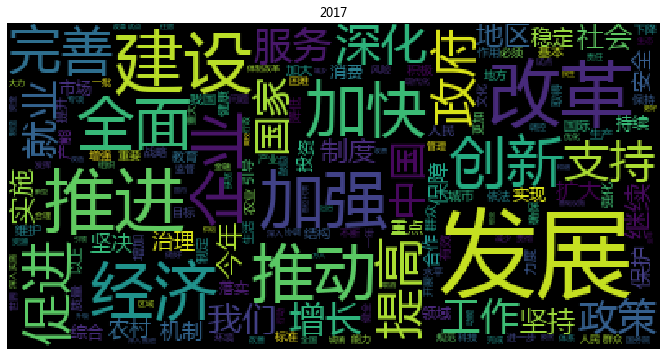

In [45]:
txt = reports[-1]
tfidf200= jieba.analyse.extract_tags(txt, topK=200, withWeight=False)
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i in tfidf200]
txt200 = r' '.join(seg_list)
wordcloudplot(txt200, txt[:4]) 

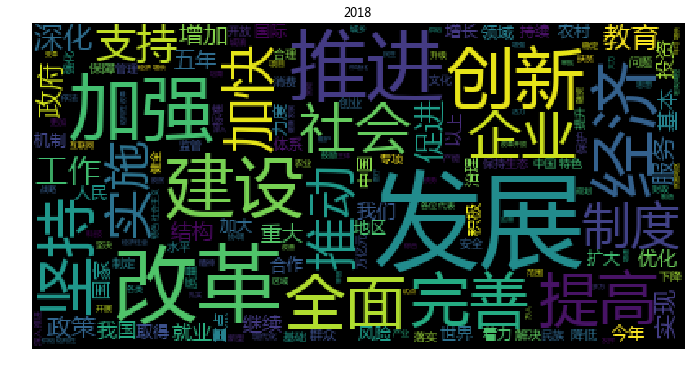

In [24]:
txt = reports[-2]
tfidf200= jieba.analyse.extract_tags(txt, topK=200, withWeight=False)
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i in tfidf200]
txt200 = r' '.join(seg_list)
wordcloudplot(txt200, txt[:4]) 

In [59]:
wordfreq = defaultdict(int)
for i in seg_list:
    wordfreq[i] +=1
wordfreq = [[i, wordfreq[i]] for i in wordfreq]

wordfreq.sort(key= lambda x:x[1], reverse = True )
u"、 ".join([ i[0] + u'（' + str(i[1]) +u'）' for i in wordfreq ])

'发展（125）、 改革（68）、 推进（65）、 建设（54）、 经济（52）、 加强（45）、 推动（42）、 加快（40）、 政府（36）、 创新（36）、 完善（35）、 企业（35）、 全面（35）、 促进（34）、 提高（32）、 就业（31）、 实施（31）、 中国（31）、 支持（29）、 深化（29）、 政策（28）、 服务（27）、 国家（26）、 人民（26）、 工作（26）、 制度（25）、 我们（25）、 深入（25）、 社会（25）、 增长（25）、 群众（24）、 坚持（24）、 今年（23）、 继续（23）、 地区（22）、 扩大（22）、 农村（20）、 坚决（20）、 机制（19）、 治理（19）、 稳定（19）、 地方（19）、 保障（18）、 安全（18）、 保护（18）、 持续（17）、 合作（17）、 市场（17）、 重点（17）、 实现（17）、 消费（16）、 投资（16）、 综合（16）、 落实（16）、 试点（16）、 结构（15）、 有效（15）、 维护（15）、 加大（15）、 产能（15）、 积极（15）、 领域（15）、 教育（15）、 改善（14）、 国际（14）、 国内（14）、 城市（14）、 我国（14）、 生态（14）、 以上（14）、 基本（14）、 问题（14）、 强化（13）、 增加（13）、 农业（13）、 提升（13）、 制定（13）、 力度（13）、 质量（13）、 引导（13）、 降低（13）、 依法（12）、 战略（12）、 升级（12）、 重要（12）、 标准（12）、 作用（12）、 健康（12）、 保持（12）、 增强（12）、 生产（12）、 文化（12）、 更加（12）、 必须（12）、 创业（12）、 目标（12）、 民生（12）、 下降（12）、 确保（11）、 取得（11）、 供给（11）、 生活（11）、 核心（11）、 规范（11）、 环境（11）、 收费（11）、 进一步（11）、 管理（11）、 做好（10）、 完成（10）、 资金（10）、 能力（10）、 不断（10）、 开展（10）、 产业（10）、 健全（10）、 水平（10）、 科技（10）、 体系（10）、 风险（10）、 世界（10）、 鼓励（10）、 重大（10）、 一年（10）、 监管（10

#### 基于停用词过滤的词云

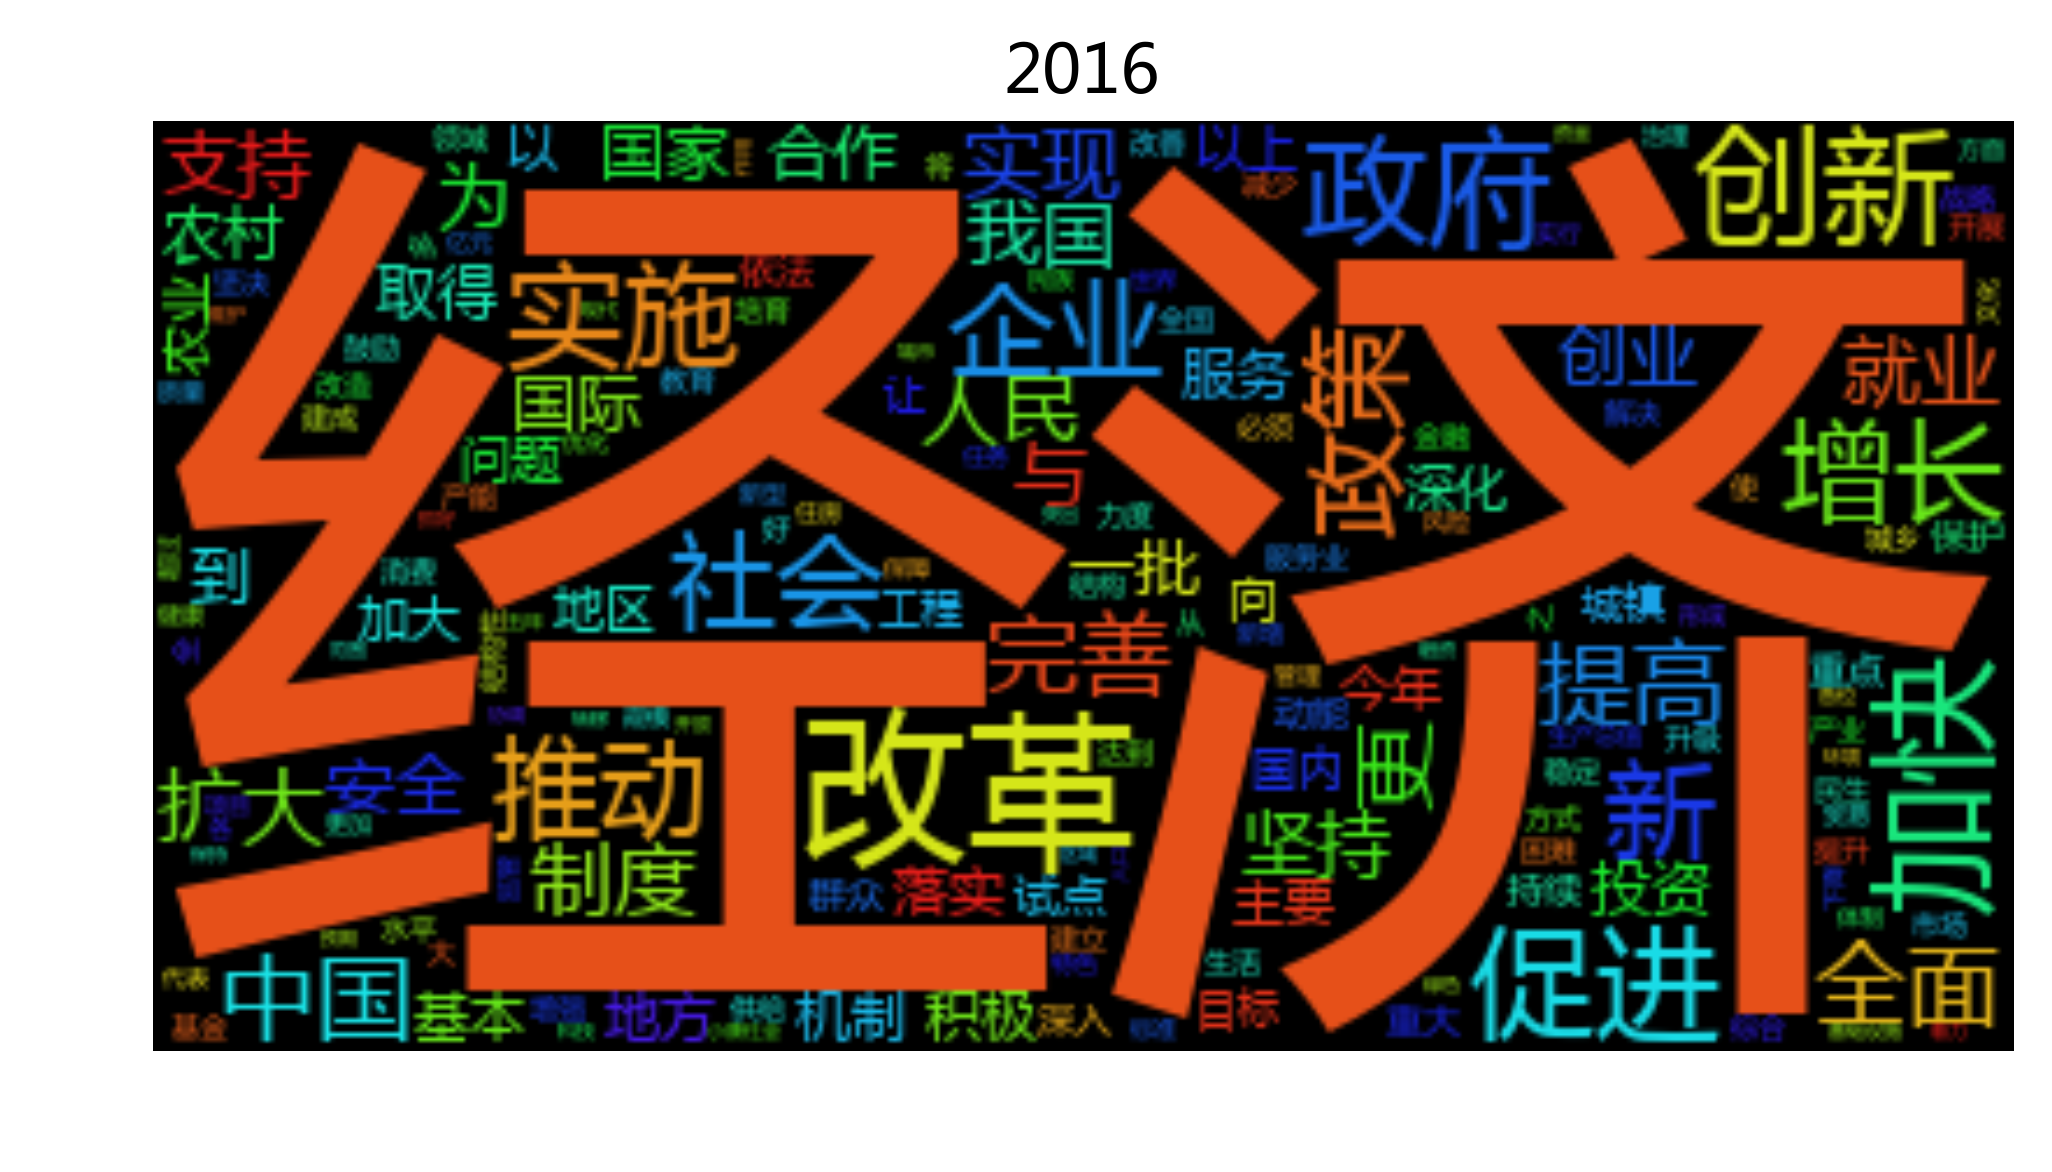

In [70]:
#jieba.add_word('股灾', freq=100, tag=None) 

txt = reports[-1]
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i not in stopwords]
txt = r' '.join(seg_list)
wordcloudplot(txt, txt[:4])  
#file_path = '/Users/chengjun/GitHub/cjc2016/figures/wordcloud-' + txt[:4] + '.png'
#plt.savefig(file_path,dpi = 300, bbox_inches="tight",transparent = True)

### 绘制1954-2016政府工作报告词云

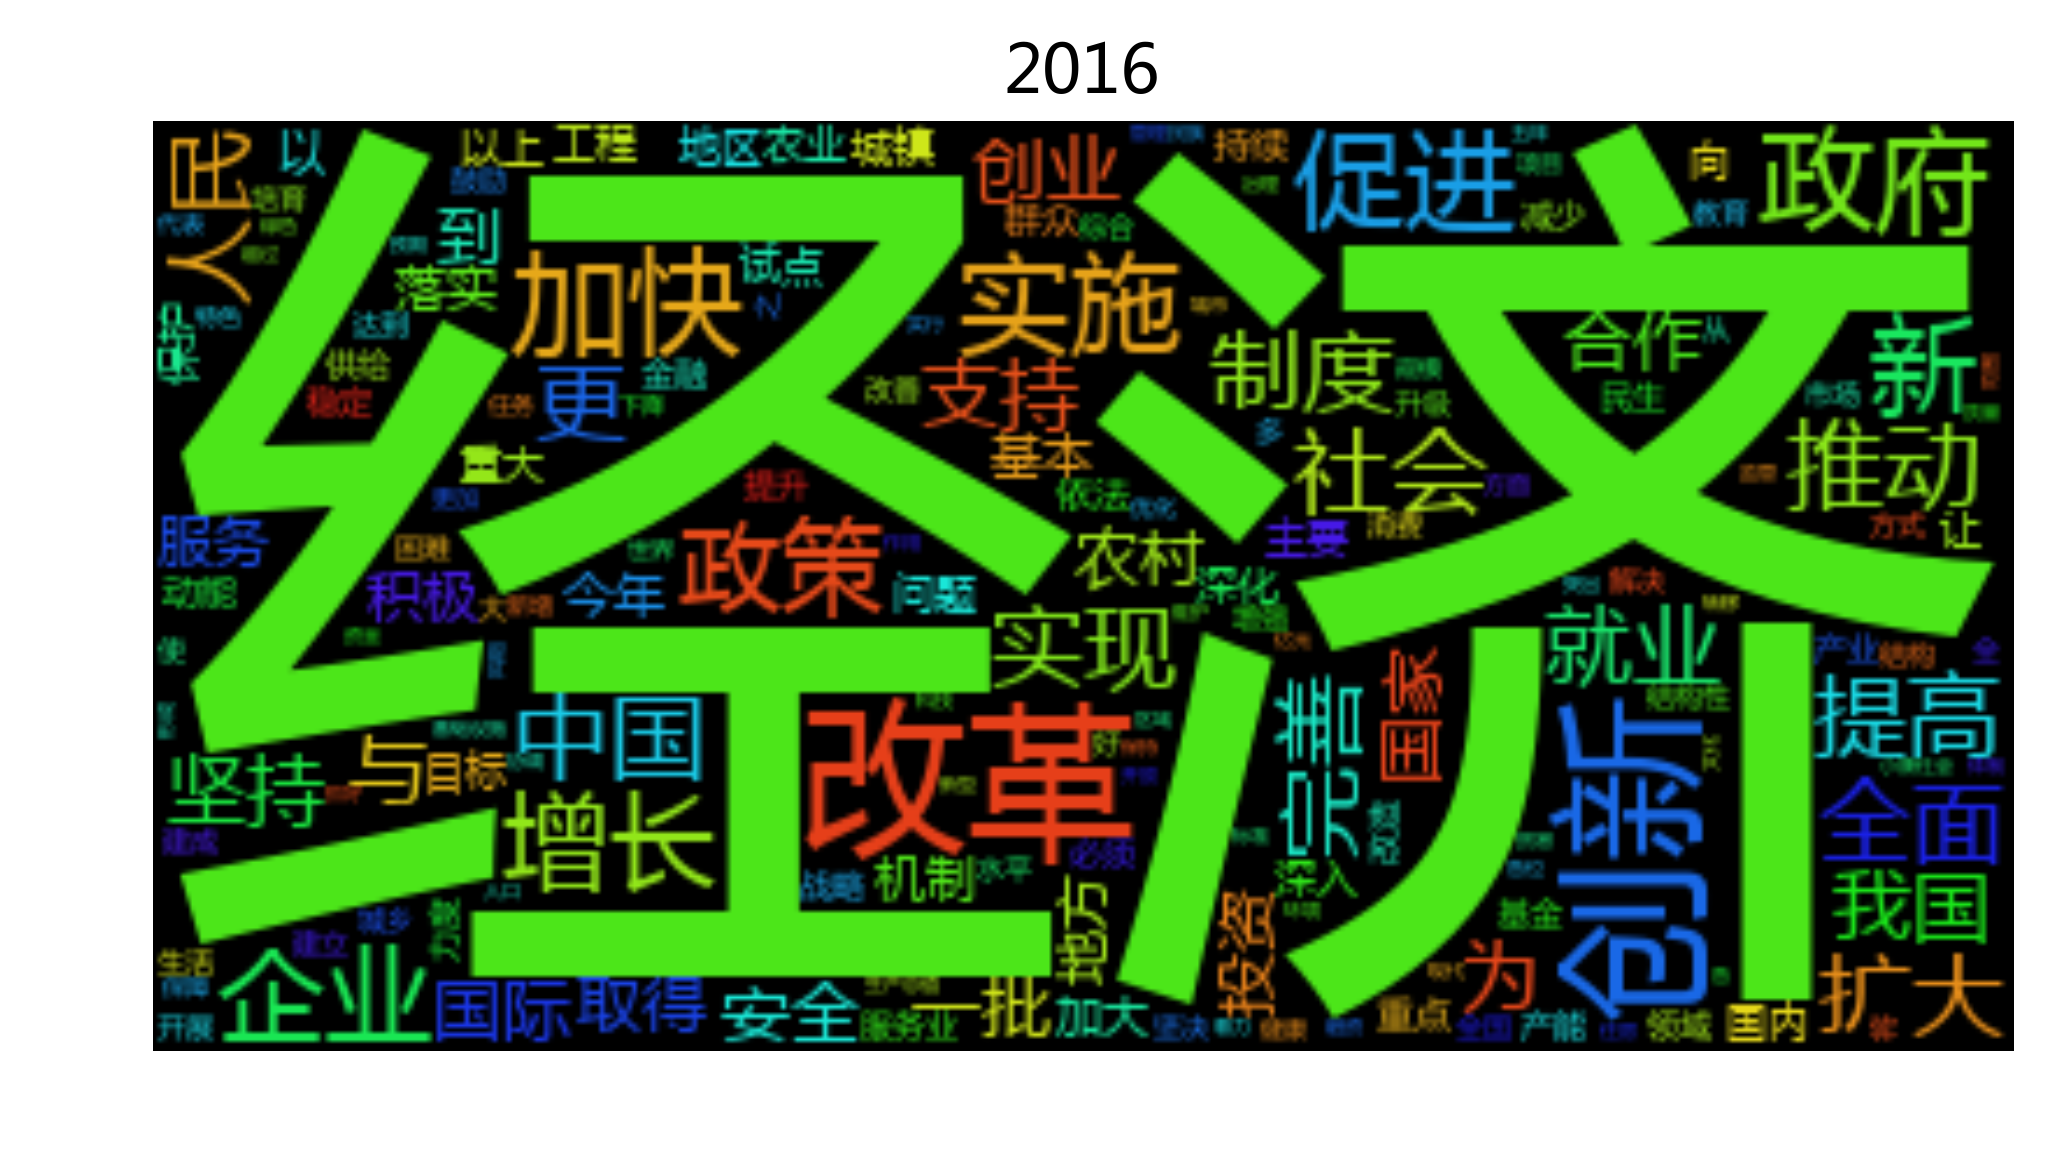

In [113]:
#jieba.add_word('股灾', freq=100, tag=None) 

for txt in reports:
    seg_list = jieba.cut(txt, cut_all=False)
    seg_list = [i for i in seg_list if i not in stopwords]
    txt = r' '.join(seg_list)
    wordcloudplot(txt, txt[:4]) 
    file_path = '../figure/wordcloud-' + txt[:4] + '.png'
    plt.savefig(file_path,dpi = 400, bbox_inches="tight",\
                transparent = True)


## 5. 词向量的时间序列

In [89]:
reports[0][:500]

'1954\t1954年政府工作报告——1954年5月23日在中华人民共和国第一届全国人民代表大会第一次会议上\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\xa0 国务院总理周恩来各位代表：\u3000\u3000我们第一届全国人民代表大会第一次会议，在听了刘少奇同志关于宪法草案的报告并进行了三天的讨论以后，已经光荣地完成了一件历史性的工作，通过了我们国家的根本法——中华人民共和国宪法，接着，又通过了几个重要的法律。现在，我代表中央人民政府作工作报告。\u3000\u3000我国伟大的人民革命的根本目的，是在于从帝国主义、封建主义和官僚资本主义的压迫下面，最后也从资本主义的束缚和小生产的限制下面，解放我国的生产力，使我国国民经济能够沿着社会主义的道路而得到有计划的迅速的发展，以便提高人民的物质生活和文化生活的水平，并且巩固我们国家的独立和安全。我国的经济原来是很落后的；如果我们不建设起强大的现代化的工业、现代化的农业、现代化的交通运输业和现代化的国防，我们就不能摆脱落后和贫困，我们的革命就不能达到目的。在一九四九年至一九五二年间，中央人民政府按照中国人民政治协商会议共同纲领的规定，先后完成了全国大陆的统一，完成了土地制度的改革，进'

In [90]:
reports[1][:500]

'1955\t1955年国务院政府工作报告关于发展国民经济的第一个五年计划的报告\xa0——1955年7月5日至6日在第一届全国人民代表大会第二次会议上\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\xa0 国务院副总理兼国家计划委员会主任李富春目录\xa0 一、国家在过渡时期的总任务\xa0 二、第一个五年计划概要\xa0 三、第一个五年计划的若干问题\xa0 （一）关于工业和运输业的基本建设问题\xa0 （二）关于工业的生产问题\xa0 （三）关于农业的增产问题\xa0 （四）关于对资本主义工商业的社会主义改造问题\xa0 （五）关于保证市场的稳定问题\xa0 （六）关于培养建设干部问题\xa0 （七）关于提高人民的物质生活和文化生活的水平问题\xa0 （八）关于厉行节约问题\xa0 （九）关于苏联和各人民民主国家同我国建设的关系\u3000四、为完成和超额完成第一个五年计划而奋斗\t\t\u3000\u3000各位代表：\u3000\u3000中华人民共和国国务院向第一届全国人民代表大会第二次会议提出关于发展国民经济第一个五年计划的议案，我现在代表国务院向本次大会作关于第一个五年计划的报告。\u3000\u3000中华人民共和国发展国民经济的第一个五年计划草案，是在中国共产党中央委员会和毛泽东主席的直接领导下编制完成的。一九五五年三月间经过中国共产党的全国代表会'

In [27]:
test = jieba.analyse.textrank(reports[0], topK=200, withWeight=False)

In [57]:
test = jieba.analyse.extract_tags(reports[1], topK=200, withWeight=False)

In [56]:
import jieba.analyse

wordset = []
for k, txt in enumerate(reports):
    print(k)
    top200= jieba.analyse.extract_tags(txt, topK=200, withWeight=False)
    for w in top200:
        if w not in wordset:
            wordset.append(w)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51


In [57]:
len(wordset)

2718

In [58]:
print(' '.join(wordset))

发展 建设 推进 加强 完善 创新 实施 就业 促进 推动 体系 坚持 改革 支持 市场主体 脱贫 加快 企业 健全 全面 服务 经济 机制 提升 社会 深化 保障 稳定 优化 防控 提高 政策 疫情 战略 高质量 持续 民生 保持 强化 基本 国家 习近平 科技 农村 工作 扩大 构建 力度 社会主义 目标 加大 继续 区域 帮扶 落实 现代化 安全 能力 制度 重大 监管 统筹 成果 保护 行动 人民 乡村 深入 做好 政府 中国 基础 增长 工程 取得 教育 贯彻 任务 城镇 实现 扎实 降低 健康 领域 农业 消费 精神 巩固 治理 城乡 试点 合作 合理 国内 融合 更好 处置 党中央 水平 改善 国际 文化 生活 努力 坚决 抗疫 小微 及时 增加 十四五 有效 市场化 规范 拓展 生产 中小 万亿元 市场 维护 协同 高水平 弘扬 新型 产业 公共卫生 投资 我们 地区 经济社会 基层 整治 进一步 活力 开放 住房 核心 重点 金融 增强 振兴 质量 残疾人 生态 数字 工商户 生产总值 贷款 稳步 防范 攻坚 发挥 高标准 常态 经济运行 开展 群众 放管服 100 体制 制定 实体 引导 强军 积极 共建 环境 中央 挑战 减税 精准 有序 各位 特色 营商 职业技能 科学 各类 协定 我国 公共服务 基础设施 综合 产业链 今年 公平 关键 恢复 粮食 全国 更加 能源 繁荣 绿色 作用 攻坚战 宏观政策 完成 代表 监督 攻关 扶贫 人员 小康社会 降费 困难 自贸 失业 激发 坚定 大力 减免 创业 贫困人口 复工 支出 农民 重要 领导人 医疗 改革开放 去年 努力完成 防治 建成 电商 同志 出台 扶持 举措 培育 新冠 复产 六稳 六保 投入 安排 各国 研发 设施 一定 各族人民 共享 农民工 坚强 海外侨胞 制造业 鼓励 高校 万人 应急 养老 主要 低保 台湾同胞 广大 全年 大幅 专项 负责制 防疫 服务业 规划 全部 试验区 形式主义 打赢 成本 物资 诚挚 依法 延长 风险 问题 贫困地区 地方 收费 融资 污染 以上 解决 确保 三大 负担 财政 一批 医保 结构 办好 公平竞争 审批 改造 结构性 退役军人 压减 主体 互联网 缴费 民营 化解 公正 切实 抓好 压力 稳妥 下降 不断 各级 2019 提质 70 3%

In [60]:
from collections import defaultdict

data = defaultdict(dict)
years = [int(i[:4]) for i in reports]
for i in wordset:
    for year in years:
        data[i][year] = 0 

In [62]:
for txt in reports:
    year = int(txt[:4])
    print(year)
    top1000= jieba.analyse.extract_tags(txt, topK=1000, withWeight=True)
    for ww in top1000:
        word, weight = ww
        if word in wordset:
            data[word][year]+= weight

2021
2020
2019
2018
2017
2016
2015
2014
2013
2012
2011
2010
2009
2008
2007
2006
2005
2004
2003
2002
2001
2000
1999
1998
1997
1996
1995
1994
1993
1992
1991
1990
1989
1988
1987
1986
1985
1984
1983
1982
1981
1980
1979
1978
1975
1964
1959
1960
1957
1956
1955
1954


In [63]:
word_weight = []
for i in data:
    word_weight.append([i, np.sum(list(data[i].values()))])

In [64]:
word_weight.sort(key= lambda x:x[1], reverse = True )
top50 = [i[0] for i in word_weight[:50]]

In [65]:
' '.join(top50) 

'发展 建设 改革 经济 推进 加强 句細 社会 政府 加快 工作 提高 实施 完善 企业 促进 创新 增长 全面 坚持 推动 社会主义 支持 政策 人民 就业 制度 国家 投资 增加 基本 鍥界 农村 扩大 问题 实现 跺害 农业 继续 鍥介 中国 取得 服务 氫富 归潰 重点 保障 国际 教育 群众'

In [75]:
def plotEvolution(word, color, linestyle, marker):
    cx = data[word]
    plt.plot(list(cx.keys()), list(cx.values()), color = color, 
             linestyle=linestyle, marker=marker, label= word)
    plt.legend(loc=2,fontsize=18)
    plt.ylabel(u'词语重要性')


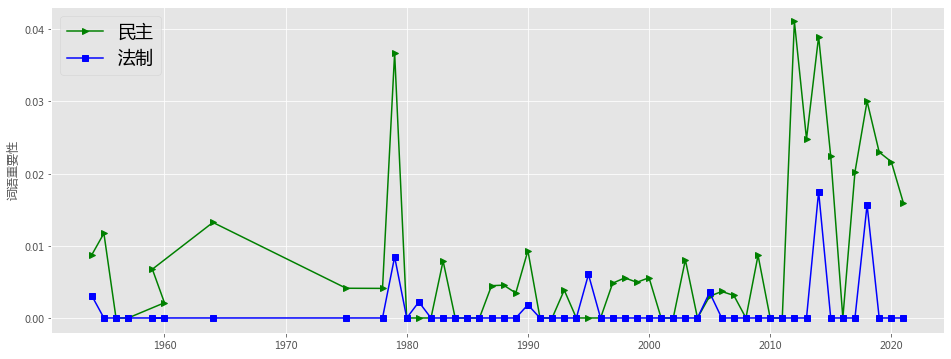

In [76]:
plt.figure(figsize=(16, 6),facecolor='white')
plotEvolution(u'民主', 'g', '-', '>')
plotEvolution(u'法制', 'b', '-', 's')

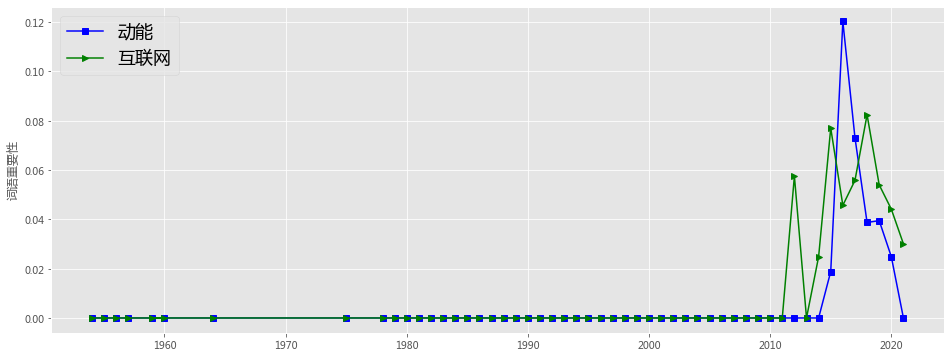

In [77]:
plt.figure(figsize=(16, 6),facecolor='white')

plotEvolution(u'动能', 'b', '-', 's')
plotEvolution(u'互联网', 'g', '-', '>')

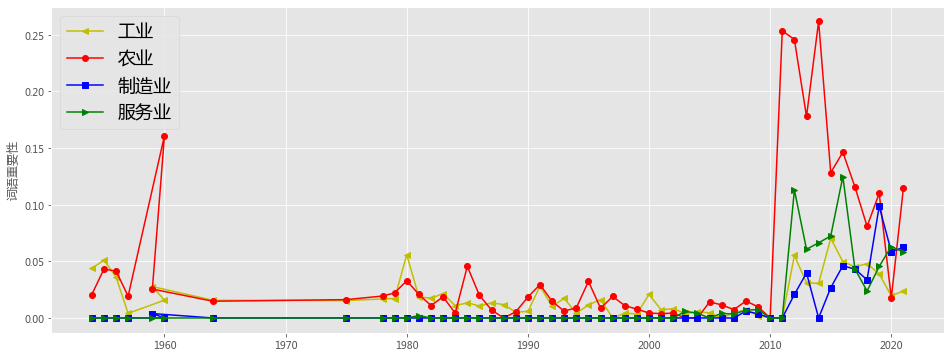

In [78]:
plt.figure(figsize=(16, 6),facecolor='white')

plotEvolution(u'工业', 'y', '-', '<')
plotEvolution(u'农业', 'r', '-', 'o')
plotEvolution(u'制造业', 'b', '-', 's')
plotEvolution(u'服务业', 'g', '-', '>')


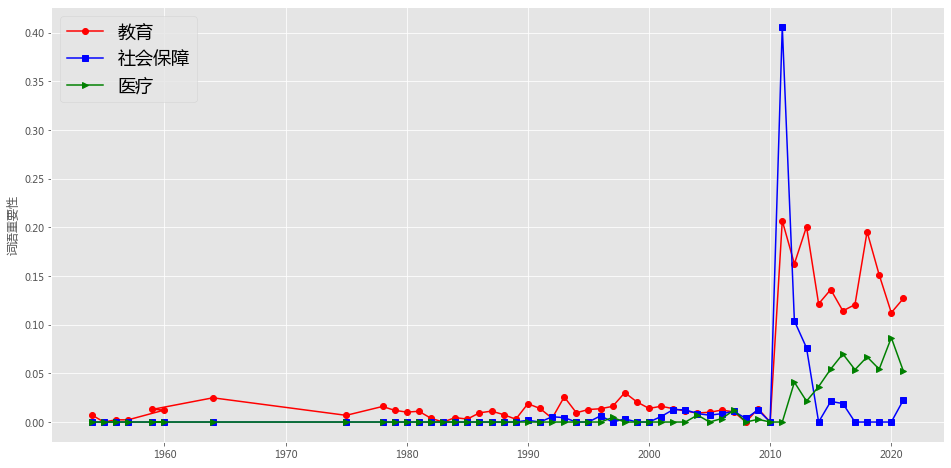

In [79]:
plt.figure(figsize=(16, 8),facecolor='white')

plotEvolution(u'教育', 'r', '-', 'o')
plotEvolution(u'社会保障', 'b', '-', 's')
plotEvolution(u'医疗', 'g', '-', '>')


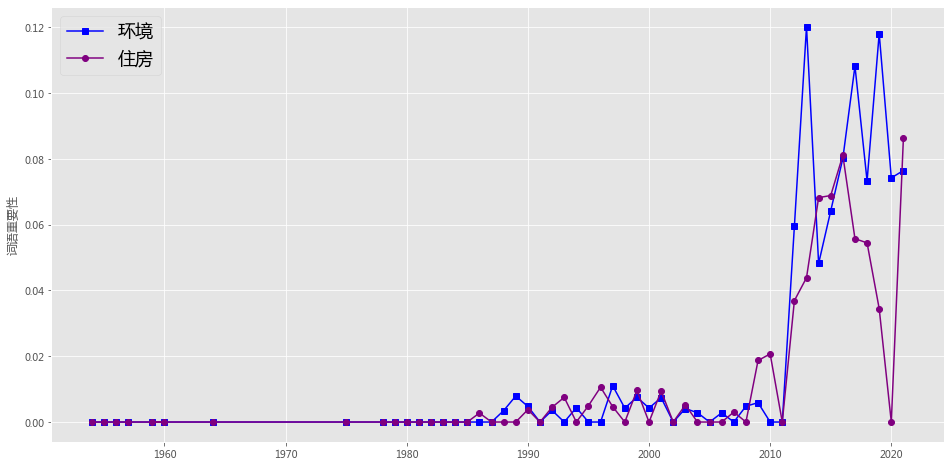

In [80]:
plt.figure(figsize=(16, 8),facecolor='white')

plotEvolution(u'环境', 'b', '-', 's')
plotEvolution(u'住房', 'purple', '-', 'o')

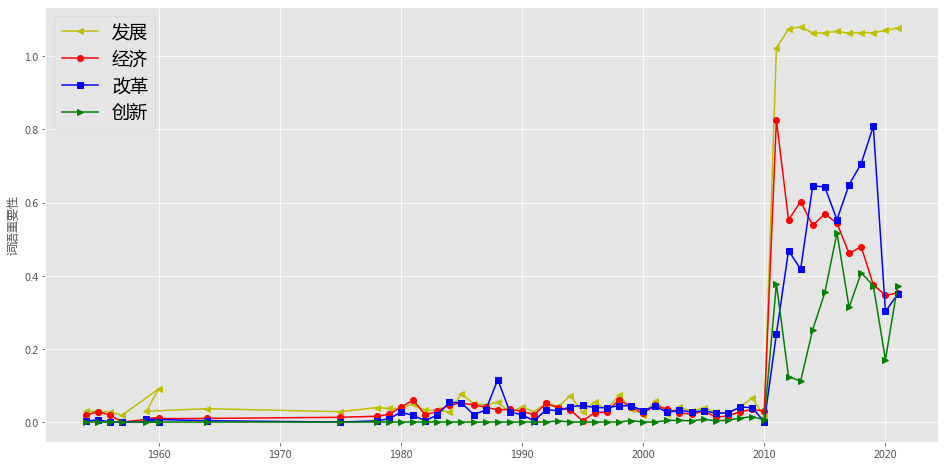

In [81]:
plt.figure(figsize=(16, 8),facecolor='white')

plotEvolution(u'发展', 'y', '-', '<')
plotEvolution(u'经济', 'r', '-', 'o')
plotEvolution(u'改革', 'b', '-', 's')
plotEvolution(u'创新', 'g', '-', '>')

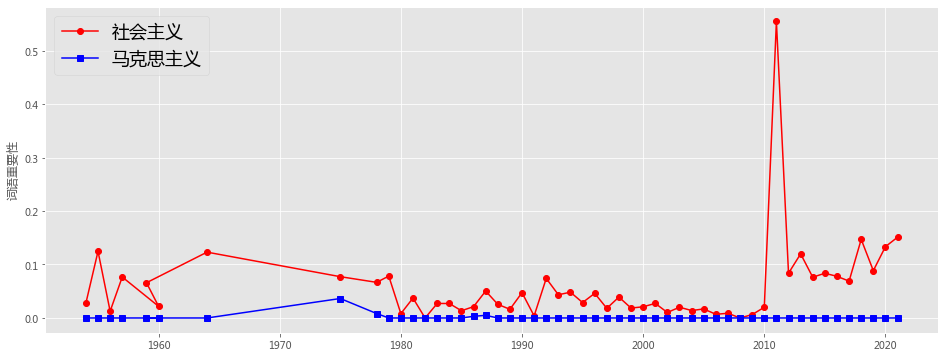

In [82]:
plt.figure(figsize=(16, 6),facecolor='white')

plotEvolution(u'社会主义', 'r', '-', 'o')
plotEvolution(u'马克思主义', 'b', '-', 's')

![image.png](images/end.png)